### RQ1: Are books written by women authors rated or reviewed differently compared to books by men authors?


#### Descriptive Statistics

Descriptive Statistics for Ratings by Author Gender
                   mean  median  count       std  min  max
author_gender                                             
Female         3.087751       3    547  1.695603    1    5
Male           3.146676       3   1384  1.676520    1    5


<Figure size 576x432 with 0 Axes>

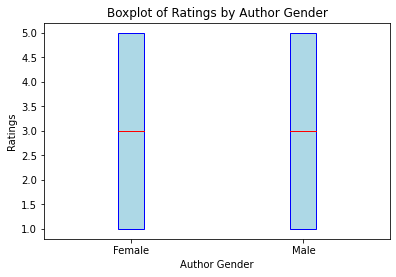

In [3]:
# Re-import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = r'C:\Users\niyim\cleaned_dataset.csv'  # Use your file path
data = pd.read_csv(file_path)

# Ensure the 'rating' column is numeric for descriptive statistics
data['rating'] = pd.to_numeric(data['rating'], errors='coerce')

# Step 1: Create Descriptive Statistics Table
# Group data by 'author_gender' and calculate descriptive statistics
descriptive_stats = data.groupby('author_gender')['rating'].agg(['mean', 'median', 'count', 'std', 'min', 'max'])

# Display Descriptive Statistics Table neatly
print("Descriptive Statistics for Ratings by Author Gender")
print(descriptive_stats.to_string())

# Optionally save the descriptive statistics to a CSV file
descriptive_stats.to_csv(r'C:\Users\niyim\descriptive_stats.csv', index=True)

# Step 2: Create a Boxplot for Ratings by Author Gender
plt.figure(figsize=(8, 6))
data.boxplot(column='rating', by='author_gender', grid=False, patch_artist=True,
             boxprops=dict(facecolor='lightblue', color='blue'),
             medianprops=dict(color='red'),
             whiskerprops=dict(color='blue'),
             capprops=dict(color='blue'))

plt.title('Boxplot of Ratings by Author Gender')
plt.suptitle('')  # Remove the default subplot title
plt.xlabel('Author Gender')
plt.ylabel('Ratings')
plt.show()


### Visualization

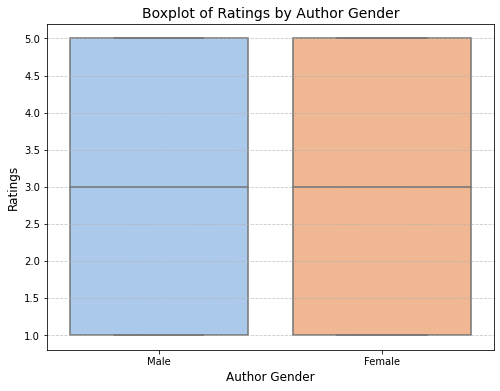

No handles with labels found to put in legend.


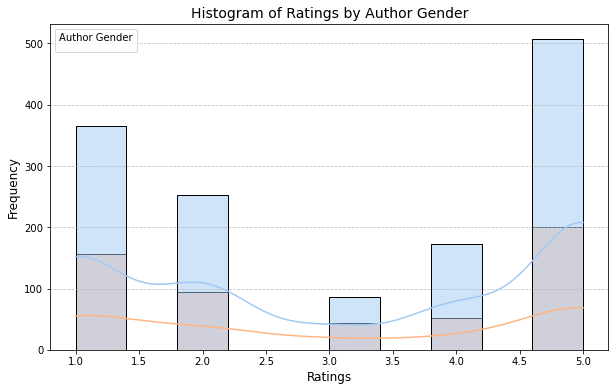

In [4]:
# Re-import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = r'C:\Users\niyim\cleaned_dataset.csv'  # Use your file path
data = pd.read_csv(file_path)

# Ensure the 'rating' column is numeric for visualization
data['rating'] = pd.to_numeric(data['rating'], errors='coerce')

# Remove rows with missing ratings for clean visualization
data = data.dropna(subset=['rating'])

# Boxplot of Ratings by Author Gender
plt.figure(figsize=(8, 6))
sns.boxplot(x='author_gender', y='rating', data=data, palette='pastel')
plt.title('Boxplot of Ratings by Author Gender', fontsize=14)
plt.xlabel('Author Gender', fontsize=12)
plt.ylabel('Ratings', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Histogram of Ratings by Author Gender
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='rating', hue='author_gender', kde=True, palette='pastel', bins=10)
plt.title('Histogram of Ratings by Author Gender', fontsize=14)
plt.xlabel('Ratings', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(title='Author Gender')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


### Statistical Test Result


In [5]:
# Re-import necessary libraries
import pandas as pd
from scipy.stats import ttest_ind, mannwhitneyu

# Load the dataset
file_path = r'C:\Users\niyim\cleaned_dataset.csv'  # Use your file path
data = pd.read_csv(file_path)

# Ensure the 'rating' column is numeric for statistical testing
data['rating'] = pd.to_numeric(data['rating'], errors='coerce')

# Remove rows with missing ratings
data = data.dropna(subset=['rating'])

# Separate ratings for male and female authors
male_ratings = data[data['author_gender'] == 'Male']['rating']
female_ratings = data[data['author_gender'] == 'Female']['rating']

# Perform an independent t-test
t_stat, t_p_value = ttest_ind(male_ratings, female_ratings, equal_var=False)  # Welch's t-test

# Perform a Mann-Whitney U test
u_stat, u_p_value = mannwhitneyu(male_ratings, female_ratings, alternative='two-sided')

# Display the results
print("T-Test Results:")
print(f"T-Statistic: {t_stat:.4f}, P-Value: {t_p_value:.4f}")

print("\nMann-Whitney U Test Results:")
print(f"U-Statistic: {u_stat:.4f}, P-Value: {u_p_value:.4f}")

# Interpretation
if t_p_value < 0.05:
    print("\nThe t-test indicates a statistically significant difference in ratings between male and female authors.")
else:
    print("\nThe t-test indicates no statistically significant difference in ratings between male and female authors.")

if u_p_value < 0.05:
    print("The Mann-Whitney U test indicates a statistically significant difference in ratings between male and female authors.")
else:
    print("The Mann-Whitney U test indicates no statistically significant difference in ratings between male and female authors.")


T-Test Results:
T-Statistic: 0.6903, P-Value: 0.4902

Mann-Whitney U Test Results:
U-Statistic: 384831.5000, P-Value: 0.5522

The t-test indicates no statistically significant difference in ratings between male and female authors.
The Mann-Whitney U test indicates no statistically significant difference in ratings between male and female authors.


### Sentimental Analysis

<Figure size 720x432 with 0 Axes>

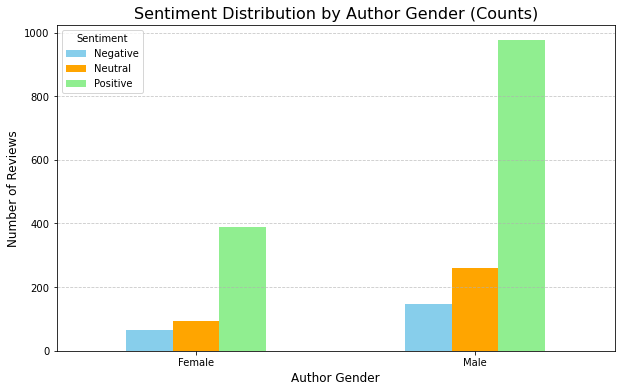

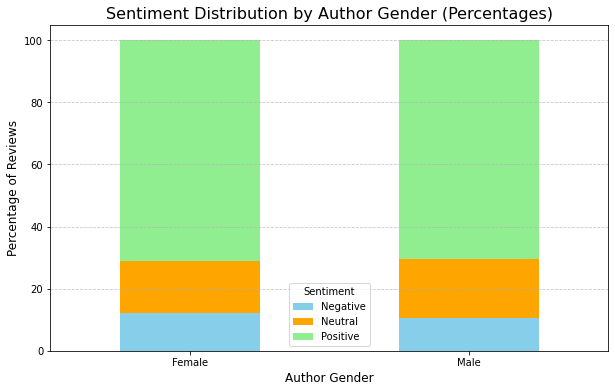

Sentiment Distribution Table:
sentiment      Negative  Neutral  Positive
author_gender                             
Female               66       93       388
Male                147      261       976


In [7]:
# Re-import necessary libraries after reset
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob

# Reload the dataset
file_path = r'C:\Users\niyim\cleaned_dataset.csv'  # Use the uploaded file path for your local environment
data = pd.read_csv(file_path)

# Ensure the 'normalized_review_text' column is filled
data['normalized_review_text'] = data['normalized_review_text'].fillna('')

# Perform sentiment classification
def classify_sentiment_with_threshold(text):
    polarity = TextBlob(str(text)).sentiment.polarity
    if polarity > 0.05:
        return 'Positive'
    elif polarity < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

data['sentiment'] = data['normalized_review_text'].apply(classify_sentiment_with_threshold)

# Group by author gender and sentiment
sentiment_distribution = data.groupby(['author_gender', 'sentiment']).size().unstack(fill_value=0)

# Convert counts to percentages for visualization
sentiment_percentage = sentiment_distribution.div(sentiment_distribution.sum(axis=1), axis=0) * 100

# Plot a bar chart for sentiment distribution (counts)
plt.figure(figsize=(10, 6))
sentiment_distribution.plot(kind='bar', stacked=False, figsize=(10, 6), color=['skyblue', 'orange', 'lightgreen'])
plt.title('Sentiment Distribution by Author Gender (Counts)', fontsize=16)
plt.xlabel('Author Gender', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Sentiment', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Plot a bar chart for sentiment percentage
sentiment_percentage.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'orange', 'lightgreen'])
plt.title('Sentiment Distribution by Author Gender (Percentages)', fontsize=16)
plt.xlabel('Author Gender', fontsize=12)
plt.ylabel('Percentage of Reviews', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Sentiment', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Print Sentiment Distribution Table
print("Sentiment Distribution Table:")
print(sentiment_distribution)

# Optionally save the sentiment distribution table to a CSV file
sentiment_distribution.to_csv(r'C:\Users\niyim\sentiment_distribution.csv', index=True)
